# Lab 3: Pandas

*Since this is Pandas exercise, you are not allowed to use loop as well as apply/applymap methods and I will tell you which part you can*

(Last update: 14/11/2022)

Full name: Lê Nguyễn Bình nam

Student ID: 20127567

---

## Instructions for doing and submitting assignment

&#9889; Note that I will use a software for grading your assignment so you have to follow exactly what I said. If you are not sure about something, please raise your question on Zalo group.

**How to do your assignment**

You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
```python
# YOUR CODE HERE
raise NotImplementedError()
```

For optional coding parts, there will be:
```python
# YOUR CODE HERE (OPTION)
```

For markdown cell, there will be:
```markdown
YOUR ANSWER HERE
```

Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means that if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.
 
While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

Keep your code clean and clear by using meaningful variable names and comments. Do not write too-long coding lines.
Press `Ctrl + S` right after editing.

Keep it real: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

**How to submit your assignment**

When grading your assignment, first, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

After that, you make a submited direction as follow:
- Folder `Student code` (for example, if your student code is 1234567, then you name your folder `1234567`)
    - File `Lab3.ipynb` only

Finally, you compress your folder (`Student code`) and submit on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## Programming environment

- You will re-use the Linux environment setup in Lab 0 - WarmUp. Don't forget to start your coding environment (`conda activate min_ds-env`) before doing your assignment.
- Use Jupyter notebook or Jupyter lab, <font color=red>not Google Colab</font> (I can not grade you well on Google Colab) to edit your `*.ipynb` file.

In [1]:
import sys
sys.executable

'/root/miniconda3/envs/min_ds-env/bin/python'

Your file now should run on `min_ds-env`.

---

## Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# YOUR CODE HERE (OPTION) 

---

## Data collection

In this assignment, you will use data in file "mvt.csv" (mvt stands for motor vehicle theft). The data is about car theft in the city of Chicago, Illinois, USA and is used in the "The Analytics Edge" course (edx.com) You can find more detail about data in [this link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

---

## Data exploration

### Store data to a dataframe

In [3]:
mvt_df = pd.read_csv('mvt.csv')
mvt_df.head()

/tmp/ipykernel_7782/903309213.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  mvt_df = pd.read_csv('mvt.csv')


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761


### How many rows and columns in dataset? (0.5p)

Use pandas to find the number of rows and columns and store in 2 variables `num_rows` and `num_cols`.

In [4]:
# YOUR CODE HERE
num_rows, num_cols = mvt_df.shape[0], mvt_df.shape[1]

In [5]:
# TEST
assert num_rows == 191641
assert num_cols == 11

### What is the meaning of each row? Are there any 2 rows with different meaning?

According to data description of the course and by taking a quick look at the data, each line provides information about a case. It seems that there is no outlier line.

### Is the data duplicated? (0.5p)

You are going to check that and save the result into `have_duplicated_rows`. The value of this variable is `True` if the data is duplicated and vice versa.

In [6]:
# YOUR CODE HERE
have_duplicated_rows = (mvt_df.duplicated().sum() != 0)

In [7]:
# TEST
assert have_duplicated_rows == False

### What is the meaning of each row?

According to the data description of the course about the file "mvt.csv":

- **ID**: a unique identifier for each observation.
- **Date**: the date the crime occurred.
- **LocationDescription**: the location where the crime occurred.
- **Arrest**: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).
- **Domestic**: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).
- **Beat**: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
- **District**: the police district in which the crime occurred. Each district is composed of many beats, and are defined by the Chicago Police Department.
- **CommunityArea**: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.
- **Year**: the year in which the crime occurred.
- **Latitude**: the latitude of the location at which the crime occurred.
- **Longitude**: the longitude of the location at which the crime occurred.

### What is the datatype of each column? Are there any columns with datatypes that are not suitable for further processing?

You can check the datatype (`dtype`) of each element in a column in `mvt_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [8]:
# YOUR CODE HERE
col_dtypes = mvt_df.dtypes

In [9]:
# TEST
assert col_dtypes['ID'] in [np.int64, np.int32]
assert col_dtypes['Beat'] in [np.int64, np.int32]
assert col_dtypes['Year'] in [np.int64, np.int32]
assert col_dtypes['Latitude'] in [np.float64, np.float32]
assert col_dtypes['Longitude'] in [np.float64, np.float32]
assert col_dtypes['Date'] == object
assert col_dtypes['LocationDescription'] == object
assert col_dtypes['District'] == object
assert col_dtypes['CommunityArea'] == object
assert col_dtypes['Arrest'] == bool
assert col_dtypes['Domestic'] == bool

**What does that mean by saying that `dtype` is `object`?**

There are 4 columns with the datatype of `object`: "Date", "LocationDescription", "District", "CommunityArea". In Pandas, `object` types usually refer to strings. But in fact, an element of `object` type can contain any object in Python as they store the addresses of variables. If the datatype of a column in dataframe is `object`, the datatype of elements in that column can be different from each other. In order to specify the datatype of elements in column, you have to access each of them (e.g. `type(column.iloc[i])`). When reading the data from "mvt.csv", you might notice a warning that says "Columns (6,7) have mixed types". That means the datatypes of column number 6 and 7 are heterogeneous. Now, you will take a look at the datatypes of element in these 2 columns.

Your work is to write a function that has the series as input and the datatypes of elements in column as output. You can use the `apply` method.

In [10]:
def open_object_dtype(s):
    dtypes = set()
    
    # YOUR CODE HERE
    for i in s:
        dtypes.add(type(i))
    
    return dtypes

In [11]:
# TEST
assert open_object_dtype(mvt_df['Date']) == {str}
assert open_object_dtype(mvt_df['LocationDescription']) == {str}
assert open_object_dtype(mvt_df['District']) == {str, float}
assert open_object_dtype(mvt_df['CommunityArea']) == {str, float}

**Before continuing**:

- The datatype of column "Date" is `str`. In order for you to explore more about the data, you have to change the datatype to `datetime`.
- Column "District" and "CommunityArea" contain `str` and `float` data. You also have to change the datatype to `float`.

---

## Preprocess

### Change the dtype of "Data" to `datetime` (0.5p)

You have to change the `dtype` of column "Date" to `datetime` (after doing that, `dtype` of column "Date" in `mvt_df` should be `datetime`).

Hint: You can use `pd.to_datetime`. You should pass the `format` parameter so your command can run faster (if you do not pass the `format` param, Pandas will have to guess the format of your data).

In [12]:
# YOUR CODE HERE
mvt_df['Date'] = pd.to_datetime(mvt_df['Date'], format='%m/%d/%y %H:%M')

In [13]:
# TEST 
# Nếu dtype của cột "Date" đã được chuyển sang datetime thì phải dùng được .dt.
assert mvt_df['Date'].dt.year.min() == 2001 

### Change the dtype of "District" and "CommunityArea" to `float` (0.5p)

Change the `dtype` of column "District" and "CommunityArea" to `float` (after doing that, the `dtype` of column "District" and "CommunityArea" should be changed).

You should replace the "space" element (" ") with NaN before changing the `dtype`.

In [14]:
# YOUR CODE HERE
mvt_df['District'] = mvt_df['District'].replace(" ", np.nan).astype(float)
mvt_df['CommunityArea'] = mvt_df['CommunityArea'].replace(" ", np.nan).astype(float)

In [15]:
# TEST
assert mvt_df['District'].dtype in [np.float32, np.float64]
assert mvt_df['CommunityArea'].dtype in [np.float32, np.float64]

---

## Data exploration (cont.)

### How does the numeric data distribute? (0.5p)

We consider datetime columns to be numeric columns. For now, there are 8 columns that seem to be numeric data: "ID", "Date", "Beat", "District", "CommunityArea", "Year", "Latitude", "Longitude". In fact, "ID", "Beat", "District", "CommunityArea" are categorical columns. Therefore, there are only 4 numeric columns: "Date", "Year", "Latitude", "Longitude".

For each of numeric column, you will compute the percentage of missing values; min, max value and store them into a dataframe named `nume_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "min", "max") and 4 columns ("Date", "Year", "Latitude", "Longitude").

In [16]:
# YOUR CODE HERE
nameset = ['Date', 'Year', 'Latitude', 'Longitude']
def missing_ratio(x):
    return x.isna().sum() / x.size * 100
nume_col_profiles_df = mvt_df[nameset].agg([missing_ratio, min, max])
nume_col_profiles_df

,Date,Year,Latitude,Longitude
missing_ratio,0.0,0.0,1.187637,1.187637
min,2001-01-01 00:01:00,2001.0,41.644710,-87.925510
max,2012-12-31 23:15:00,2012.0,42.022878,-87.524676


In [17]:
## TEST
df = nume_col_profiles_df
assert dict(df['Date']) == \
                    {'missing_ratio': 0.0,
                     'min': pd.Timestamp('2001-01-01 00:01:00'),
                     'max': pd.Timestamp('2012-12-31 23:15:00')}
assert dict(df['Year']) == {'missing_ratio': 0.0, 
                            'min': 2001.0, 
                            'max': 2012.0}
assert dict(df['Latitude'].round(3)) == {'missing_ratio': 1.188, 
                                         'min': 41.645, 
                                         'max': 42.023}
assert dict(df['Longitude'].round(3)) == {'missing_ratio': 1.188,
                                          'min': -87.926, 
                                          'max': -87.525}

### How does the categorical data distribute? (0.75p)

`mvt_df` contains 7 categorical columns: "ID", "LocationDescription", "Arrest", "Domestic", "Beat", "District", "CommunityArea".

For each of categorical column, compute the percentage of missing values, number of different values (missing values are not counted), a list of different values (missing values are not counted) and store them into a dataframe named `cate_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "num_diff_vals", "diff_vals") and 7 columns ("ID", "LocationDescription", "Arrest", "Domestic", "Beat", "District", "CommunityArea").

In [18]:
# YOUR CODE HERE
def diff_vals(x):
    return x.dropna().unique()

def num_diff_vals(x):
    return diff_vals(x).size
nameset = ['ID', 'LocationDescription', 'Arrest', 'Domestic', 'Beat', 'District', 'CommunityArea']
cate_col_profiles_df = mvt_df[nameset].agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,ID,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea
missing_ratio,0.0,0.0,0.0,0.0,0.0,22.467009,12.844851
num_diff_vals,191641,78,2,2,300,26,78
diff_vals,"[8951354, 8951141, 8952745, 8952223, 8951608, ...","[STREET, RESIDENTIAL YARD (FRONT/BACK), GAS ST...","[False, True]","[False, True]","[623, 1213, 1622, 724, 211, 2521, 423, 231, 10...","[6.0, 12.0, 16.0, 7.0, 2.0, 25.0, 4.0, 10.0, 9...","[69.0, 24.0, 11.0, 67.0, 35.0, 19.0, 48.0, 40...."


In [19]:
# TEST
df = cate_col_profiles_df
assert dict(df.loc['missing_ratio'].astype(float).round(3)) == \
                                    {'ID': 0.0,
                                     'LocationDescription': 0.0,
                                     'Arrest': 0.0,
                                     'Domestic': 0.0,
                                     'Beat': 0.0,
                                     'District': 22.467,
                                     'CommunityArea': 12.845}
assert dict(df.loc['num_diff_vals'].astype(int)) == \
                                    {'ID': 191641,
                                     'LocationDescription': 78, 
                                     'Arrest': 2,
                                     'Domestic': 2,
                                     'Beat': 300, 
                                     'District': 26, 
                                     'CommunityArea': 78}
assert dict(df.loc['diff_vals'].apply(len)) == \
                                    {'ID': 191641,
                                     'LocationDescription': 78,
                                     'Arrest': 2,
                                     'Domestic': 2,
                                     'Beat': 300, 
                                     'District': 26, 
                                     'CommunityArea': 78}

### Clarify the meaning of columns "Beat", "District", "CommunityArea" (1.25p)

Như vậy, "Beat" là đơn vị nhỏ nhất, "District" thì gồm nhiều "Beat". Vậy có phải là các "District" không bị overlap với nhau không? (không có trường hợp mà một "Beat" vừa thuộc "District" này, vừa thuộc "District" kia). Và mỗi "CommunityArea" là gồm nhiều "Beat" và cũng không overlap với nhau? Để trả lời cho hai câu hỏi này, dưới đây bạn sẽ tính tỉ lệ (từ 0 đến 1) các "Beat" mà thuộc nhiều hơn một "District", và tỉ lệ các "Beat" mà thuộc nhiều hơn một "CommunityArea". Bạn lần lượt lưu các kết quả vào hai biến là `multi_district_ratio` và `multi_comarea_ratio`.

According to the description of the course:

- **Beat**: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
- **District**: the police district in which the crime occurred. Each district is composed of many beats, and are defined by the Chicago Police Department.
- **CommunityArea**: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

Therefore, "Beat" is the smallest region, "District" consists of many "Beat". 

Is there any "Beat" that belongs to 2 "District" or 2 "CommunityArea"? In order to answer this question, you will calculate the ratios that a "Beat" belongs to more than a "District" or a "CommunityArea" and store them in `multi_district_ratio` and `multi_comarea_ratio`. If the ratios are bigger than 0, then the answer is yes!

In [20]:
# YOUR CODE HERE
df = mvt_df
num_of_beat = cate_col_profiles_df.loc['num_diff_vals', 'Beat']
multi_district_ratio = df.groupby(['Beat','District']).size().unstack('District')
multi_district_ratio = multi_district_ratio.dropna(thresh = 2).shape[0]/ num_of_beat
multi_comarea_ratio = df.groupby(['Beat','CommunityArea']).size().unstack('CommunityArea')
multi_comarea_ratio= multi_comarea_ratio.dropna(thresh = 2).shape[0]/ num_of_beat

In [21]:
# TEST
assert round(multi_district_ratio, 3) == 0.210
assert round(multi_comarea_ratio, 3) == 0.603

---

## Propose meaningful questions & Answer them

After exploring and having a better knowledge about data, you can see that we can answer some questions based on data:
- How does the number of cases change?
- For cases occurring in each year, what is the ratio that the main culprit is arrested until the time of data collection?
- For each year, which "Beat" has the most/least number of cases?
- In the last 3 years, name 5 places (residential yard, street or somewhere) with the highest probability of crime.
- In each year of the last 3 years, how does the number of cases change by month?

---

## Preprocess

### Add column "Month" to dataframe (0.5p)

We need the information of moth that occurs cases to answer a question. Therefore, before analyzing data to answer questions, you should preprocess by adding column "Month" to `mvt_df`.

In [22]:
# YOUR CODE HERE
mvt_df = mvt_df.assign(Month=pd.DatetimeIndex(mvt_df['Date']).month)
mvt_df

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6.0,69.0,2012,41.756284,-87.621645,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12.0,24.0,2012,41.898788,-87.661303,12
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16.0,11.0,2012,41.969186,-87.767670,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7.0,67.0,2012,41.769329,-87.657726,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2.0,35.0,2012,41.837568,-87.621761,12
...,...,...,...,...,...,...,...,...,...,...,...,...
191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,41.887566,-87.711323,1
191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,41.981924,-87.658878,1
191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,41.799024,-87.696538,1
191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,41.971437,-87.727056,1


In [23]:
# TEST
assert mvt_df['Month'].min() == 1
assert mvt_df['Month'].max() == 12

---

## Analyze data to answer questions

### How does the number of cases change? (0.75p)

In order to answer this question, you will perform 2 steps:
- Step #1: Compute the number of cases for each year and store the result to a series called `num_thefts_each_year` (index is years).
- Step #2: Draw a line chart. x-axis indicates years and y-axis indicates the number of cases. Set the marker option to point for a better look. You should name the x-axis and y-axis "Year" and "NumThefts", respectively.

Step #1 

In [24]:
# YOUR CODE HERE
num_thefts_each_year = mvt_df.groupby('Year')['ID'].count()

In [25]:
# TEST
assert num_thefts_each_year.loc[2001] == 20669
assert num_thefts_each_year.loc[2012] == 14092

Step #2

[Text(0, 0.5, 'NumThefts')]

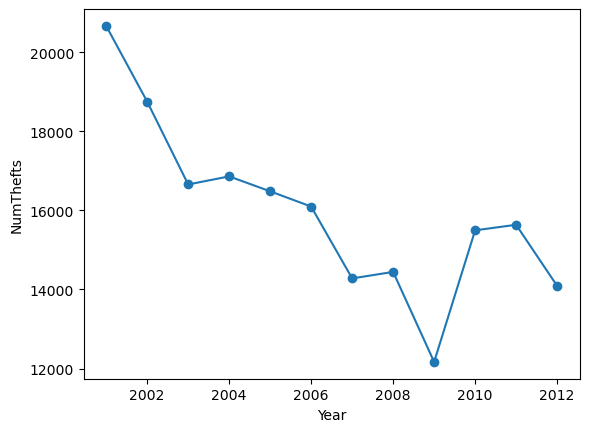

In [26]:
# YOUR CODE HERE
num_thefts_each_year.plot(kind ='line', marker ='o').set(ylabel= 'NumThefts')

### For cases occurring in each year, what is the ratio that the main culprit is arrested until the time of data collection? (1.25p)

In order to answer this question, you will perform 2 steps:

- Step #1: Calculate the rate of arrests per year. Store the result to a series called `arrest_ratio_each_year` (index is years).
- Step #2: Draw a line chart. x-axis indicates years and is named "Year". y-axis indicates the ratio per year and is named "ArrestRatio".

Step #1.

In [27]:
# YOUR CODE HERE
df = mvt_df.groupby(['Year', 'Arrest'])['Arrest'].size().unstack('Arrest')
arrest_ratio_each_year = pd.Series(df.values[:, 1]/ (df.values[:, 0] + df.values[:, 1]), index=df.index)
arrest_ratio_each_year

Year
2001    0.104117
2002    0.112782
2003    0.107943
2004    0.100403
2005    0.092696
2006    0.080880
2007    0.084874
2008    0.070613
2009    0.069039
2010    0.045235
2011    0.039969
2012    0.039029
dtype: float64

In [28]:
# TEST
assert round(arrest_ratio_each_year.loc[2001], 3) == 0.104
assert round(arrest_ratio_each_year.loc[2012], 3) == 0.039

Step #2.

[Text(0, 0.5, 'ArrestRatio')]

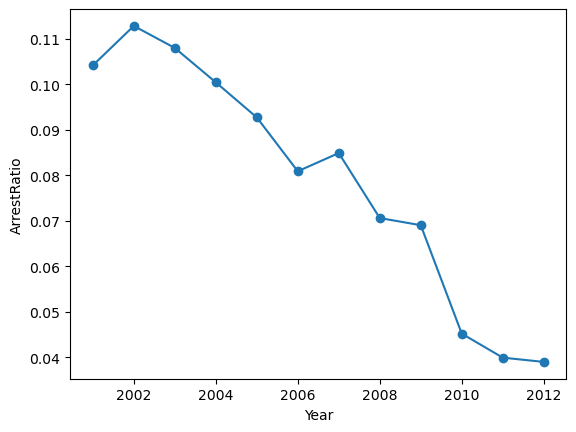

In [29]:
# YOUR CODE HERE
arrest_ratio_each_year.plot(kind ='line', marker ='o').set(ylabel= 'ArrestRatio')

By observing the chart, you can see that there is a downward trend in ratio of crime in the recently years. Why? In general, we can't know for sure. But you can make a guess and provide an explanation. Hint: the year under consideration is the time that the crime occurred; the column "Arrest" indicates the fact that police did or did not catch the thief at the time of data collection.

- YOUR ANSWER HERE:
    - The catch rate has decreased because there are many missions close to 2013 that are still under investigation and have not been caught. Maybe in the next few years the crime rate will be higher.

### For each year, which "Beat" has the most/least number of cases? (0.75p)

Store the results in a dataframe called `two_beats_each_year_df`. This dataframe contains 12 rows corresponding to the years from 2001 to 2012, and 2 columns: "SafeBeat" - the "Beat" that has the least number of cases; "DangerousBeat" - the "Beat" that has the most number of cases.

In [30]:
# YOUR CODE HERE
df = mvt_df
df0 = df.groupby(['Year', 'Beat']).size().unstack('Year')
df1 = df0.idxmin().values
df2 = df0.idxmax().values
two_beats_each_year_df = pd.DataFrame(np.array([df1, df2]).T, columns = ["SafeBeat", "DangerousBeat"], index = df0.columns)
two_beats_each_year_df

,SafeBeat,DangerousBeat
Year,,
2001,134,833
2002,1833,833
2003,123,815
2004,1914,2413
2005,130,1723
2006,123,831
2007,112,823
2008,235,831
2009,1235,2512


In [31]:
# TEST
df = two_beats_each_year_df
assert df.loc[2001, 'SafeBeat'] == 134
assert df.loc[2001, 'DangerousBeat'] == 833
assert df.loc[2012, 'SafeBeat'] in [134, 2122, 2322, 2324]
assert df.loc[2012, 'DangerousBeat'] == 824

### In the last 3 years, name 5 places (residential yard, street or somewhere) with the highest probability of crime. (0.75p)

You may find the column "LocationDescription" useful. Note that "OTHER" is not counted. Store the results in a list named `top5_locs`. The first element is the place that occurred the most cases, the second element is the place that occurred the second most cases, and so on.

In [32]:
# YOUR CODE HERE
df = mvt_df[mvt_df['Year'].isin([2010, 2011, 2012]) & (mvt_df['LocationDescription'] != 'OTHER')]
top5_locs = list(df.groupby('LocationDescription').size().sort_values(ascending = False).head(5).index)
top5_locs

['STREET',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'VEHICLE NON-COMMERCIAL',
 'ALLEY']

In [33]:
# TEST
assert top5_locs == ['STREET', 
                     'PARKING LOT/GARAGE(NON.RESID.)', 
                     'RESIDENTIAL YARD (FRONT/BACK)', 
                     'VEHICLE NON-COMMERCIAL', 
                     'ALLEY']

### In each year of the last 3 years, how does the number of cases change by month? (1p)

In order to answer this question, you will perform 2 steps:

- Step #1: Compute dataframe called `num_thefts_each_month_df` which contains 3 columns ("2010", "2011" and "2012") corresponding to the number of cases by month, and 12 rows corresponding to 12 months.
- Step #2: Draw a line chart (each line indicates a year). x-axis indicates months. y-axis indicates the number of cases. Set the marker option to point for a better look. You should name the x-axis and y-axis, "Month" and "NumThefts", respectively. Create a legend for the chart.

Step #1. 

In [34]:
# YOUR CODE HERE
df = mvt_df[mvt_df['Year'].isin([2010, 2011, 2012])]
num_thefts_each_month_df = df.groupby(['Month', 'Year']).size().unstack()

In [35]:
# TEST
df = num_thefts_each_month_df
assert df.shape == (12, 3)
assert df.loc[1, 2010] == 1278
assert df.loc[1, 2011] == 1508
assert df.loc[1, 2012] == 1253

Step #2. 

[Text(0, 0.5, 'NumThefts')]

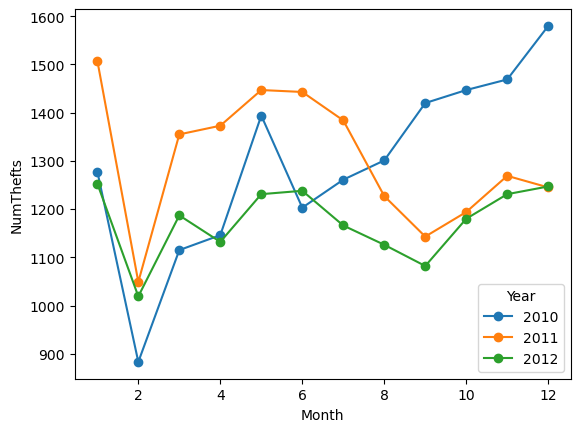

In [36]:
# YOUR CODE HERE
num_thefts_each_month_df.plot(kind = 'line', marker = 'o').set(ylabel = 'NumThefts')